In [1]:
import numpy as np
from fuel.datasets.hdf5 import H5PYDataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
data_set = H5PYDataset('/data/fashion/extract_sample_3_128_128.h5', which_sets=('all',))

In [6]:
data_set

In [7]:
print(data_set.num_examples)

186759


In [8]:
handle = data_set.open()
data = data_set.get_data(handle, slice(0, 10))

In [9]:
img = data[1][9]
implot = plt.imshow(img)

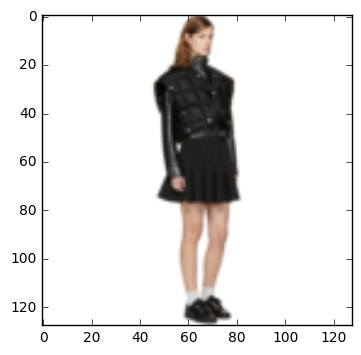

In [10]:
plt.show()

In [11]:
data[2][0]

array([   1.,    1.,  210.,    1.])